# Redes neurais Recorrentes (RNN)

### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
tf.compat.v1.disable_eager_execution()

### RNN básica - implementação manual

In [3]:
tf.compat.v1.reset_default_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.compat.v1.placeholder(tf.float32, [None, n_inputs])
X1 = tf.compat.v1.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.compat.v1.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.compat.v1.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.math.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.math.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.compat.v1.global_variables_initializer()

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.compat.v1.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### Saída da rede em ambos intervalos para todos os neurônios e todas as instâncias no minilote:

In [4]:
print(Y0_val)

[[-0.9292309   0.21474057 -0.12915571  0.48339853 -0.12168597]
 [-0.9453479   0.9924072  -0.9528377   0.9893008  -0.32115355]
 [-0.9578743   0.9999551  -0.9984886   0.999834   -0.4956883 ]
 [ 1.          0.9999924  -0.9999964   0.99982053 -0.81004506]]


In [5]:
print(Y1_val)

[[ 0.4526714   0.99998546 -0.9997825   0.99997705 -0.98249745]
 [-0.8092     -0.99118733  0.9938392  -0.9163951  -0.8390757 ]
 [ 0.27587575  0.98118156 -0.1959674   0.9657002  -0.92443734]
 [ 0.8012901   0.9927326   0.9985852  -0.05828086  0.9561478 ]]


### Desenrolamento estático através do tempo

In [6]:
tf.compat.v1.reset_default_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.compat.v1.placeholder(tf.float32, [None, n_inputs])
X1 = tf.compat.v1.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.compat.v1.nn.static_rnn(basic_cell, [X0, X1], dtype=tf.float32)
Y0, Y1 = output_seqs

init = tf.compat.v1.global_variables_initializer()

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.compat.v1.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
print(Y0_val)

[[-0.75895983  0.3400113   0.94230473  0.52180266 -0.24049175]
 [-0.99932796  0.8492658   0.99848884  0.9842553  -0.4880398 ]
 [-0.9999983   0.97337997  0.99996144  0.99959934 -0.67597884]
 [-0.9995692  -0.7197753  -0.9989893   0.9990812   0.34861642]]


In [8]:
print(Y1_val)

[[-0.9999998   0.9668398   0.9989235   0.99952376 -0.716678  ]
 [-0.9176656  -0.4178842   0.1343207  -0.6269127  -0.20180708]
 [-0.9999971   0.7315453   0.9682632   0.9812145  -0.51459897]
 [-0.9713243   0.6028014   0.6579353   0.9050441   0.28244194]]


### Desenrolamento dinâmico através do tempo

In [9]:
n_steps = 2
n_inputs = 3
n_neurons = 5

tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.compat.v1.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

init = tf.compat.v1.global_variables_initializer()

X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instância 1
        [[3, 4, 5], [0, 0, 0]], # instância 2
        [[6, 7, 8], [6, 5, 4]], # instância 3
        [[9, 0, 1], [3, 2, 1]], # instância 4
    ])

with tf.compat.v1.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

print(outputs_val)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
[[[ 0.51700026 -0.53753775  0.80512583 -0.28706634 -0.55653304]
  [-0.7321642  -0.99993515  0.23379648 -0.74560183 -0.9999998 ]]

 [[ 0.39513594 -0.9901547   0.94781274 -0.705881   -0.99836606]
  [-0.13300234  0.6276108  -0.86745507  0.33607927 -0.67801356]]

 [[ 0.25757223 -0.9998373   0.9867889  -0.89813447 -0.9999953 ]
  [-0.82658786 -0.990005   -0.8405862  -0.5952307  -0.99999267]]

 [[-0.9453138  -0.9930309  -0.99824226 -0.9850142  -0.99621993]
  [-0.9082471  -0.77422476 -0.8328735  -0.87709147 -0.9963527 ]]]


### Manipulando sentenças de entrada de comprimento variável

In [10]:
n_steps = 2
n_inputs = 3
n_neurons = 5

tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
seq_length = tf.compat.v1.placeholder(tf.int32, [None])

basic_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.compat.v1.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=seq_length)

init = tf.compat.v1.global_variables_initializer()

X_batch = np.array([
        #step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instância 1
        [[3, 4, 5], [0, 0, 0]], # instância 2 (preenchido com vetor de zeros)
        [[6, 7, 8], [6, 5, 4]], # instância 3
        [[9, 0, 1], [3, 2, 1]], # instância 4
    ])

seq_length_batch = np.array([2, 1, 2, 2])

with tf.compat.v1.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

print(outputs_val)

[[[ 0.93458766 -0.7193072   0.31245053 -0.76001716 -0.923558  ]
  [ 1.         -0.9561068   0.97031444 -0.9994637  -1.        ]]

 [[ 0.9999978  -0.95408326  0.7066738  -0.9949294  -0.9999828 ]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 1.         -0.9932587   0.8932454  -0.9999052  -1.        ]
  [ 0.9999999  -0.69140786  0.9328227  -0.933578   -0.99999595]]

 [[ 0.9999765   0.9915666  -0.9528005  -0.99862623 -0.9998361 ]
  [ 0.99659544 -0.6414234   0.6648374  -0.6759344  -0.9990536 ]]]


### Treinando um classificador de sequência

In [6]:
tf.compat.v1.reset_default_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.int32, [None])

basic_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.compat.v1.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.compat.v1.layers.dense(states, n_outputs)
xentropy = tf.compat.v1.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.compat.v1.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [7]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

X_test = X_test.reshape((-1, n_steps, n_inputs))

In [13]:
n_epochs = 100
batch_size = 150

with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 10 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
            print(epoch, 'Last batch accuracy:', acc_batch, 'Test accuracy:', acc_test)

0 Last batch accuracy: 0.91333336 Test accuracy: 0.9212
10 Last batch accuracy: 1.0 Test accuracy: 0.9741
20 Last batch accuracy: 0.9866667 Test accuracy: 0.9739
30 Last batch accuracy: 1.0 Test accuracy: 0.9793
40 Last batch accuracy: 0.98 Test accuracy: 0.977
50 Last batch accuracy: 1.0 Test accuracy: 0.9786
60 Last batch accuracy: 0.99333334 Test accuracy: 0.9773
70 Last batch accuracy: 0.97333336 Test accuracy: 0.9777
80 Last batch accuracy: 1.0 Test accuracy: 0.9791
90 Last batch accuracy: 0.9866667 Test accuracy: 0.9771


### Prevendo Séries temporais

In [5]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [16]:
tf.compat.v1.reset_default_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(cell, X, dtype=tf.float32)

n_outputs = 1
learning_rate = 0.001

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

n_iterations = 1500
batch_size = 50
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

with tf.compat.v1.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, '\tMSE:', mse)
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})    
    saver.save(sess, 'model/my_time_series_model')
    
y_pred

0 	MSE: 20.400679
100 	MSE: 0.6562308
200 	MSE: 0.2516394
300 	MSE: 0.099226914
400 	MSE: 0.079162315
500 	MSE: 0.060888298
600 	MSE: 0.049327023
700 	MSE: 0.053943075
800 	MSE: 0.04837853
900 	MSE: 0.05036985
1000 	MSE: 0.044962913
1100 	MSE: 0.051766038
1200 	MSE: 0.042916216
1300 	MSE: 0.043102656
1400 	MSE: 0.046322674


array([[[-3.4285395 ],
        [-2.4873607 ],
        [-1.1441462 ],
        [ 0.64267945],
        [ 2.1547513 ],
        [ 3.0455828 ],
        [ 3.5083144 ],
        [ 3.4149559 ],
        [ 2.8399527 ],
        [ 2.1580863 ],
        [ 1.6326289 ],
        [ 1.5457834 ],
        [ 1.9189045 ],
        [ 2.7590277 ],
        [ 3.8841624 ],
        [ 5.085305  ],
        [ 6.0726795 ],
        [ 6.618793  ],
        [ 6.60153   ],
        [ 6.0408335 ]]], dtype=float32)

### Rnn criativa

INFO:tensorflow:Restoring parameters from model/my_time_series_model


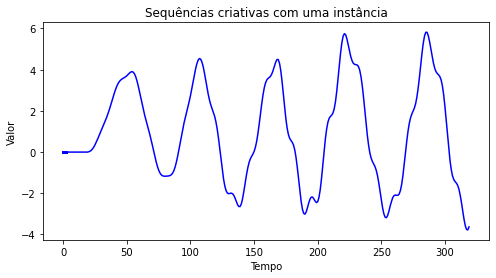

In [18]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

with tf.compat.v1.Session() as sess:
    saver.restore(sess, 'model/my_time_series_model')

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])
        
        
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, 'b-')
plt.plot(t[:n_steps], sequence[:n_steps], 'b-', linewidth=3)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Sequências criativas com uma instância')
plt.show()

### MultiRNNCell

In [19]:
tf.compat.v1.reset_default_graph()

n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])

layers = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]
multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers)
outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

init = tf.compat.v1.global_variables_initializer()
X_batch = np.random.rand(2, n_steps, n_inputs)
                                    
with tf.compat.v1.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})                                

outputs_val.shape

Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


(2, 5, 100)

### Distribuindo a Rnn em vários dispositivos

In [24]:
class DeviceCellWrapper(tf.compat.v1.nn.rnn_cell.RNNCell):
    def __init__(self, device, cell):
        self._cell = cell
        self._device = device

    @property
    def state_size(self):
        return self._cell.state_size

    @property
    def output_size(self):
        return self._cell.output_size

    def __call__(self, inputs, state, scope=None):
        with tf.compat.v1.device(self._device):
            return self._cell(inputs, state, scope)

In [25]:
tf.compat.v1.reset_default_graph()

n_inputs = 5
n_steps = 20
n_neurons = 100

X = tf.compat.v1.placeholder(tf.float32, shape=[None, n_steps, n_inputs])

devices = ['/cpu:0', '/cpu:0', '/cpu:0']
cells = [DeviceCellWrapper(dev,tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)) for dev in devices]

multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(cells)
outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    init.run()
    print(sess.run(outputs, feed_dict={X: np.random.rand(2, n_steps, n_inputs)}))

[[[-0.01024527  0.07738794  0.08025952 ...  0.04309902  0.06226901
    0.17012335]
  [-0.10363811  0.07130952  0.06840975 ... -0.07937907  0.15951197
    0.1989244 ]
  [-0.22273828  0.3853796   0.16764209 ... -0.10228992 -0.08637314
    0.55426055]
  ...
  [-0.35417774  0.43440124  0.589108   ...  0.24293865 -0.29663736
    0.67660517]
  [-0.20899323  0.76148987  0.5711088  ...  0.33963224 -0.40183413
    0.7646412 ]
  [-0.26786032  0.78920597  0.7057781  ...  0.4577092  -0.20650735
    0.7924192 ]]

 [[ 0.04816885  0.01231821  0.10429928 ...  0.01952618  0.17488609
    0.24252082]
  [ 0.02891437  0.06223075  0.04770555 ...  0.00692777  0.00486861
    0.18008871]
  [-0.2625509   0.03996788  0.02360102 ... -0.12231635  0.01540499
    0.6129265 ]
  ...
  [ 0.00960766  0.5359742   0.65483624 ...  0.04890637 -0.30614293
    0.66255796]
  [-0.2794039   0.63816893  0.5565458  ...  0.07458118 -0.38590625
    0.7760383 ]
  [-0.40246484  0.6730824   0.68278944 ...  0.15472138 -0.2615908
    0.7

### Dropout

In [26]:
tf.compat.v1.reset_default_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_outputs])

keep_prob = tf.compat.v1.placeholder_with_default(1.0, shape=())

cells = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]
cells_drop = [tf.compat.v1.nn.rnn_cell.DropoutWrapper(cell, input_keep_prob=keep_prob) for cell in cells]

multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)


learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

n_iterations = 1500
batch_size = 50
train_keep_prob = 0.5

with tf.compat.v1.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss], feed_dict={X: X_batch, y: y_batch, keep_prob: train_keep_prob})
        if iteration % 100 == 0:
            print(iteration, 'Training MSE:', mse)
    
    saver.save(sess, 'model/my_dropout_time_series_model')

0 Training MSE: 18.4021
100 Training MSE: 4.9550595
200 Training MSE: 4.0437274
300 Training MSE: 3.4854348
400 Training MSE: 3.5706801
500 Training MSE: 3.703458
600 Training MSE: 3.7963727
700 Training MSE: 3.2222974
800 Training MSE: 3.5320468
900 Training MSE: 3.281272
1000 Training MSE: 3.546964
1100 Training MSE: 4.739721
1200 Training MSE: 3.359603
1300 Training MSE: 4.3955126
1400 Training MSE: 3.721893


INFO:tensorflow:Restoring parameters from model/my_dropout_time_series_model


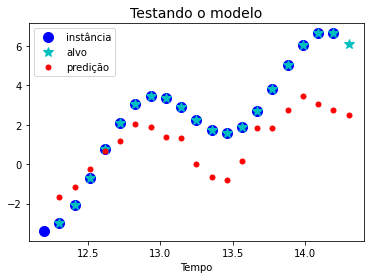

In [31]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, 'model/my_dropout_time_series_model')

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    
plt.title('Testando o modelo', fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), 'bo', markersize=10, label='instância')
plt.plot(t_instance[1:], time_series(t_instance[1:]), 'c*', markersize=10, label='alvo')
plt.plot(t_instance[1:], y_pred[0,:,0], 'r.', markersize=10, label='predição')
plt.legend(loc='upper left')
plt.xlabel('Tempo')
plt.show()

### LSTM

In [10]:
tf.compat.v1.reset_default_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.int32, [None])

lstm_cells = [tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons) for layer in range(n_layers)]
multi_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(lstm_cells)

outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]

logits = tf.compat.v1.layers.dense(top_layer_h_state, n_outputs, name='softmax')
xentropy = tf.compat.v1.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name='loss')

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.compat.v1.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.compat.v1.global_variables_initializer()

n_epochs = 10
batch_size = 150

with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, 'Last batch accuracy:', acc_batch, 'Test accuracy:', acc_test)

0 Last batch accuracy: 0.97333336 Test accuracy: 0.9542
1 Last batch accuracy: 0.97333336 Test accuracy: 0.9688
2 Last batch accuracy: 0.97333336 Test accuracy: 0.9781
3 Last batch accuracy: 0.99333334 Test accuracy: 0.9818
4 Last batch accuracy: 0.9866667 Test accuracy: 0.9848
5 Last batch accuracy: 0.99333334 Test accuracy: 0.9857
6 Last batch accuracy: 1.0 Test accuracy: 0.9878
7 Last batch accuracy: 1.0 Test accuracy: 0.9862
8 Last batch accuracy: 0.99333334 Test accuracy: 0.9873
9 Last batch accuracy: 1.0 Test accuracy: 0.9875


### Embeddings

#### Busque os dados

In [3]:
from six.moves import urllib
import errno
import os
import zipfile

WORDS_PATH = 'datasets/words'
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise


def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, 'words.zip')
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode('ascii').split()

In [4]:
words = fetch_words_data()
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

#### Construa o dicionário

In [6]:
from collections import Counter

vocabulary_size = 50000

vocabulary = [('UNK', None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [7]:
' '.join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))

In [8]:
" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59]])

'cycles originated as a term of abuse first used'

In [9]:
words[24], data[24]

('culottes', 0)

#### Gere lotes

In [10]:
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=[batch_size], dtype=np.int32)
    labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
    span = 2 * skip_window + 1
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = np.random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels


np.random.seed(42)
data_index = 0
batch, labels = generate_batch(8, 2, 1)

In [11]:
batch, [vocabulary[word] for word in batch]

(array([3081, 3081,   12,   12,    6,    6,  195,  195], dtype=int32),
 ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term'])

In [12]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[  12],
        [5234],
        [   6],
        [3081],
        [  12],
        [ 195],
        [   2],
        [   6]], dtype=int32),
 ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'of', 'a'])

#### Construa o modelo

In [14]:
batch_size = 128
embedding_size = 128
skip_window = 1
num_skips = 2
valid_size = 16
valid_window = 100
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64
learning_rate = 0.01

tf.compat.v1.reset_default_graph()


train_labels = tf.compat.v1.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

vocabulary_size = 50000
embedding_size = 150

init_embeds = tf.compat.v1.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

train_inputs = tf.compat.v1.placeholder(tf.int32, shape=[None])
embed = tf.compat.v1.nn.embedding_lookup(embeddings, train_inputs)

nce_weights = tf.Variable(tf.compat.v1.truncated_normal([vocabulary_size, embedding_size], stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

loss = tf.reduce_mean(tf.compat.v1.nn.nce_loss(nce_weights, nce_biases, train_labels, embed, num_sampled, vocabulary_size))

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

norm = tf.compat.v1.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.compat.v1.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

init = tf.compat.v1.global_variables_initializer()

#### Treine o modelo

In [15]:
num_steps = 10001

with tf.compat.v1.Session() as session:
    init.run()
    average_loss = 0
    
    for step in range(num_steps):
        print('\rIteration: {}'.format(step), end='\t')
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            print('Average loss at step ', step, ': ', average_loss)
            average_loss = 0

        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = 'Nearest to %s:' % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = '%s %s,' % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step  0 :  279.81097412109375
Nearest to often: chew, hatches, awarded, humanae, munich, documentary, sharpe, beale,
Nearest to s: mitigated, carolina, devastation, seamless, tenji, orientational, chromosomal, privileged,
Nearest to his: jalal, discworld, hijacked, designer, betrayed, gallbladder, uat, twenties,
Nearest to three: quarters, executioner, applauded, blaine, openbsd, lowell, catalonia, divergences,
Nearest to years: vil, march, vicinity, adjudication, publicize, cassius, strathclyde, eduard,
Nearest to united: fetching, sayyaf, lima, archons, saumur, admirable, goldfish, outlets,
Nearest to may: rapcore, dendrites, showcased, monoamine, cohorts, heinkel, playoff, iai,
Nearest to some: nec, solids, claudine, sparing, preserve, patience, westinghouse, parting,
Nearest to that: colonised, deceive, black, bing, kinsmen, upgrading, anhalt, asquith,
Nearest to its: helped, spiny, concepci, deutscher, buick, tuba, formidable, sgi,
Nearest to these: fl

#### Salve o modelo

In [16]:
np.save('model/my_final_embeddings.npy', final_embeddings)

#### Plote os embeddings

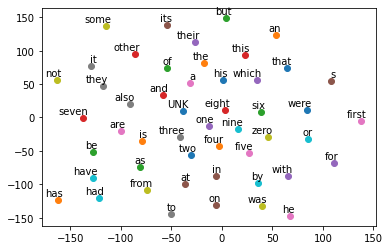

In [22]:
from sklearn.manifold import TSNE

def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), plt.figure(figsize=(25, 18))
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
        

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 50
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

### Exercícios do capítulo

*7*

Exercício: Gramáticas Reber incorporadas

#### Gera strings que respeitam a gramática

In [3]:
np.random.seed(42)

default_reber_grammar = [
    [("B", 1)],
    [("T", 2), ("P", 3)],
    [("S", 2), ("X", 4)],
    [("T", 3), ("V", 5)],
    [("X", 3), ("S", 6)],
    [("P", 4), ("V", 6)],
    [("E", None)]]

embedded_reber_grammar = [
    [("B", 1)],
    [("T", 2), ("P", 3)],
    [(default_reber_grammar, 4)],
    [(default_reber_grammar, 5)],
    [("T", 6)],
    [("P", 6)],
    [("E", None)]]

def generate_string(grammar):
    state = 0
    output = []
    while state is not None:
        index = np.random.randint(len(grammar[state]))
        production, state = grammar[state][index]
        if isinstance(production, list):
            production = generate_string(grammar=production)
        output.append(production)
    return ''.join(output)

In [4]:
for _ in range(25):
    print(generate_string(default_reber_grammar), end=' ')

BTXXTTVPXTVPXTTVPSE BPVPSE BTXSE BPVVE BPVVE BTSXSE BPTVPXTTTVVE BPVVE BTXSE BTXXVPSE BPTTTTTTTTVVE BTXSE BPVPSE BTXSE BPTVPSE BTXXTVPSE BPVVE BPVVE BPVVE BPTTVVE BPVVE BPVVE BTXXVVE BTXXVVE BTXXVPXVVE 

In [5]:
for _ in range(25):
    print(generate_string(embedded_reber_grammar), end=' ')

BTBPVVETE BTBTSSSSSSSXXVVETE BPBTSSSXXTTTTVPSEPE BTBPTTVVETE BPBTXXTVVEPE BTBTXSETE BPBTSSSSSXXTTVPXVPXTTTVVEPE BPBTSSXXTVPSEPE BPBPTTTTTTTVPSEPE BTBTSXSETE BPBPTVPXVVEPE BPBPVVEPE BPBPTVVEPE BTBPTTVPXTTVPSETE BTBTSSXSETE BTBTXXTTVVETE BPBTSXSEPE BPBPTVPSEPE BTBPVVETE BPBTXXTTTVPXTVVEPE BPBPTTVPXTVVEPE BTBPVVETE BPBPTVPXVPXTVVEPE BTBPVVETE BPBTSXSEPE 

#### Gera strings que não respeitam a gramática

In [6]:
def generate_corrupted_string(grammar, chars='BEPSTVX'):
    good_string = generate_string(grammar)
    index = np.random.randint(len(good_string))
    good_char = good_string[index]
    bad_char = np.random.choice(sorted(set(chars) - set(good_char)))
    return good_string[:index] + bad_char + good_string[index + 1:]

In [7]:

for _ in range(25):
    print(generate_corrupted_string(embedded_reber_grammar), end=' ')

BTTTXXVVETE BPBTXXSPXTVVEPE BTBTXSPTE BPTTSXXTVPXVVEPE PPBPVPSEPE BTBPTVETE BPTTSSSSSXSEPE BPBSVPSEPE BTBPVVESE BPBTXSEPS BEBTXSETE XPBTXXTVPSEPE BTBPVVEPE BTXPTVVETE BTBPVXETE BVBTXSETE BPTTXXVPXVPSEPE BTBPXVPSETE STBPTTVPXVPXTVPSETE BPBPTVPSESE BPBPVEEPE ETBTXSETE BTBTXSVTE BPBTXXVPSEPP BTBTXXVPSETS 

#### Converte em uma sequência de vetores

In [8]:
def string_to_one_hot_vectors(string, n_steps, chars='BEPSTVX'):
    char_to_index = {char: index for index, char in enumerate(chars)}
    output = np.zeros((n_steps, len(chars)), dtype=np.int32)
    for index, char in enumerate(string):
        output[index, char_to_index[char]] = 1.
    return output

string_to_one_hot_vectors("BTBTXSETE", 12)

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

#### Gera o conjunto de dados com 50% de strings boas e 50% de strings ruins

In [9]:
def generate_dataset(size):
    good_strings = [generate_string(embedded_reber_grammar) for _ in range(size // 2)]
    bad_strings = [generate_corrupted_string(embedded_reber_grammar) for _ in range(size - size // 2)]
    all_strings = good_strings + bad_strings
    
    n_steps = max([len(string) for string in all_strings])
    
    X = np.array([string_to_one_hot_vectors(string, n_steps) for string in all_strings])
    seq_length = np.array([len(string) for string in all_strings])
    
    y = np.array([[1] for _ in range(len(good_strings))] + [[0] for _ in range(len(bad_strings))])
    rnd_idx = np.random.permutation(size)
    return X[rnd_idx], seq_length[rnd_idx], y[rnd_idx]

X_train, l_train, y_train = generate_dataset(10000)

#### Cria a RNN

In [11]:
tf.compat.v1.reset_default_graph()

possible_chars = 'BEPSTVX'
n_inputs = len(possible_chars)
n_neurons = 30
n_outputs = 1

learning_rate = 0.02
momentum = 0.95

X = tf.compat.v1.placeholder(tf.float32, [None, None, n_inputs], name='X')
seq_length = tf.compat.v1.placeholder(tf.int32, [None], name='seq_length')
y = tf.compat.v1.placeholder(tf.float32, [None, 1], name='y')

gru_cell = tf.compat.v1.nn.rnn_cell.GRUCell(num_units=n_neurons)
outputs, states = tf.compat.v1.nn.dynamic_rnn(gru_cell, X, dtype=tf.float32, sequence_length=seq_length)

logits = tf.compat.v1.layers.dense(states, n_outputs, name='logits')
y_pred = tf.cast(tf.greater(logits, 0.), tf.float32, name='y_pred')
y_proba = tf.compat.v1.nn.sigmoid(logits, name='y_proba')

xentropy = tf.compat.v1.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name='loss')
optimizer = tf.compat.v1.train.MomentumOptimizer(learning_rate=learning_rate, momentum=momentum, use_nesterov=True)
training_op = optimizer.minimize(loss)

correct = tf.equal(y_pred, y, name='correct')
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='accuracy')

init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

In [12]:
X_val, l_val, y_val = generate_dataset(5000)

n_epochs = 50
batch_size = 50

with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        X_batches = np.array_split(X_train, len(X_train) // batch_size)
        l_batches = np.array_split(l_train, len(l_train) // batch_size)
        y_batches = np.array_split(y_train, len(y_train) // batch_size)
        for X_batch, l_batch, y_batch in zip(X_batches, l_batches, y_batches):
            loss_val, _ = sess.run([loss, training_op], feed_dict={X: X_batch, seq_length: l_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, seq_length: l_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, seq_length: l_val, y: y_val})
        print('{:4d}  Train loss: {:.4f}, accuracy: {:.2f}%  Validation accuracy: {:.2f}%'.format(epoch, loss_val, 100 * acc_train, 
                                                                                                  100 * acc_val))
        saver.save(sess, 'models/my_reber_classifier')

   0  Train loss: 0.6667, accuracy: 68.00%  Validation accuracy: 61.52%
   1  Train loss: 0.6514, accuracy: 72.00%  Validation accuracy: 61.36%
   2  Train loss: 0.5895, accuracy: 78.00%  Validation accuracy: 74.70%
   3  Train loss: 0.4444, accuracy: 84.00%  Validation accuracy: 80.38%
   4  Train loss: 0.4608, accuracy: 84.00%  Validation accuracy: 82.34%
   5  Train loss: 0.3261, accuracy: 88.00%  Validation accuracy: 86.80%
   6  Train loss: 0.2872, accuracy: 64.00%  Validation accuracy: 60.48%
   7  Train loss: 0.1410, accuracy: 100.00%  Validation accuracy: 95.16%
   8  Train loss: 0.0688, accuracy: 100.00%  Validation accuracy: 96.24%
   9  Train loss: 0.1132, accuracy: 100.00%  Validation accuracy: 98.46%
  10  Train loss: 0.0411, accuracy: 100.00%  Validation accuracy: 99.18%
  11  Train loss: 0.0235, accuracy: 100.00%  Validation accuracy: 99.38%
  12  Train loss: 0.0130, accuracy: 100.00%  Validation accuracy: 98.90%
  13  Train loss: 0.0174, accuracy: 100.00%  Validation ac

#### Testa a rede

In [13]:
test_strings = [
    'BPBTSSSSSSSXXTTVPXVPXTTTTTVVETE',
    'BPBTSSSSSSSXXTTVPXVPXTTTTTVVEPE']

l_test = np.array([len(s) for s in test_strings])
max_length = l_test.max()
X_test = [string_to_one_hot_vectors(s, n_steps=max_length) for s in test_strings]

with tf.compat.v1.Session() as sess:
    saver.restore(sess, 'models/my_reber_classifier')
    y_proba_val = y_proba.eval(feed_dict={X: X_test, seq_length: l_test})

print()
print('Estimated probability that these are Reber strings:')
for index, string in enumerate(test_strings):
    print('{}: {:.2f}%'.format(string, 100 * y_proba_val[index][0]))

INFO:tensorflow:Restoring parameters from models/my_reber_classifier

Estimated probability that these are Reber strings:
BPBTSSSSSSSXXTTVPXVPXTTTTTVVETE: 0.04%
BPBTSSSSSSSXXTTVPXVPXTTTTTVVEPE: 99.75%
